In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [30]:
data = pd.read_csv('car_data_all_together.csv')

In [31]:
newdata = data.sort_values(by="aspiration", ascending=False)
newdata1 = newdata.iloc[:100]
newdata1["aspiration"].value_counts()

std      63
turbo    37
Name: aspiration, dtype: int64

# One categorical - One sample proportion test - Z-test
<img src="onecat.png">

In [32]:
from statsmodels.stats.proportion import proportions_ztest
# Is there difference in the number of gas and diesel in our dataset?
# H0 There is not a difference in distribution
# Ha There is a difference in distribution

# H0: p = p0 (population proportion is equal to hypothesized proportion p0)

# The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:
# H1 (two-tailed) alternative="two-sided": p ≠ p0 (population proportion is not equal to some hypothesized value p0)
# H1 (left-tailed) alternative="smaller": p < p0 (population proportion is less than some hypothesized value p0)
# H1 (right-tailed) alternative="larger": p > p0 (population proportion is greater than some hypothesized value p0)

obs = newdata1["aspiration"].value_counts()
obs 
#There were 63 std and 37 turbo charged cars in our dataset.

std      63
turbo    37
Name: aspiration, dtype: int64

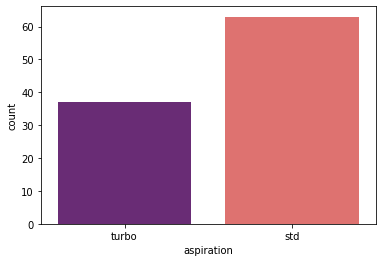

In [33]:
sns.countplot(x="aspiration", data=newdata1, palette="magma")
plt.show()

In [34]:
# Let's use the first category as 'success' and store them under a separate name:
x = obs[0]
print("The count of std (first category) is: ",x)

The count of std (first category) is:  63


In [35]:
# The value_counts returns a python series, so we can get the sum of values by using Python's sum function:
n = sum(obs.values)
print("The total count is: ",n)

The total count is:  100


In [36]:
# Lets set the expected proportions to be 0.5.
p0 = 0.5
print("The expected proportion is: ", p0)

The expected proportion is:  0.5


In [37]:
# The function requires the number of successes, the sample size, the expected proportion and also set prop_var to this expected proportion. I want a two-sided test, so all together.
zvalue, pvalue = proportions_ztest(count=x, nobs=n, value=p0, prop_var=p0, alternative="two-sided")
# The first value is the z-value, the second is the p-value (significance)
# and we can conclude that there is a significant difference between the proportions of the two categories.
# The 0.00932 (p-value) is the probability of obtaining a z-value of 2.6 or more extreme if the assumption about the fueltype (the expected proportion of 0.5) was true.
print("The z-value of one sample proportion test is: ", zvalue)
print("The p-value of one sample proportion test is: ", round(pvalue, 5))

The z-value of one sample proportion test is:  2.6
The p-value of one sample proportion test is:  0.00932


# Two categorical - Chi squared test of independence (Pearson chi square test)
<img src="twocat.png">

In [94]:
from scipy.stats import chi2_contingency
# Does the proportion of std an turbo differ across fueltype groups?
# H0 Aspiration is not dependent on fueltype.
# Ha Aspiration is dependent on fueltype.

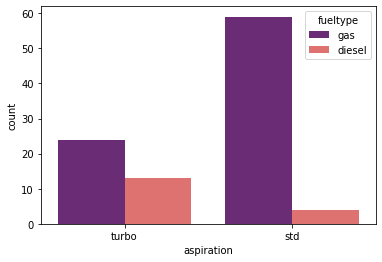

In [41]:
sns.countplot(x="aspiration", data=newdata1, palette="magma", hue="fueltype")
plt.show()

In [45]:
crosstab = pd.crosstab(newdata1["aspiration"], newdata1["fueltype"])
crosstab

fueltype,diesel,gas
aspiration,,
std,4,59
turbo,13,24


In [58]:
# The function requires the number of successes, the sample size, the expected proportion and also set prop_var to this expected proportion. I want a two-sided test, so all together.
chiVal, pVal, df, exp = chi2_contingency(crosstab)
# As the p-value is lower than alpha we can conclude that aspiration type is dependent on fuel type.
# The first value is the chi-square value of 11.72503. The chance of such a value or even more extreme, in a sample, if there is no association in the dataset is 0.00062 (p-value).
# The second value is p-value (0.00062). It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates an association between the two variables. (One has an impact on the other.)
# The third value is the degrees of freedom, which is an indication of the size of the table, since it is simply the number of rows -1, times the number of columns - 1.
# The forth values are the expected values. There are the counts to be expected if the two variables had no influence on each other. 
# (Note that as a criteria the lowest expected value should be at least 1, and not too many should be below 5. Often a threshold of 20% is used (so if more than 20% of the cells have an expected count of 5 or less, the test is not reliabe to use.))
print("The chi-square value of chi-square test is: ", round(chiVal,5))
print("The p-value of chi-square test is: ", round(pVal,5))
print("The degrees of freedom of chi-square test is: ", df)
print("The expected values of chi-square test is: ", exp)

The chi-square value of chi-square test is:  11.72503
The p-value of chi-square test is:  0.00062
The degrees of freedom of chi-square test is:  1
The expected values of chi-square test is:  [[10.71 52.29]
 [ 6.29 30.71]]


In [85]:
# Concatenate values in both lists into one list.
exp1 = np.concatenate((exp[0], exp[1]))

In [96]:
# Check the first lowest expected value.
print("The lowest expected value is: ", exp.min())
# Check the percentage of cells with a count of less than 5.
print("The percentage of cells with a count of less than 5: ", len(exp1[exp1 < 5])/(len(exp1))*100)

The lowest expected value is:  6.29
The percentage of cells with a count of less than 5:  0.0


# One numeric - T-test
<img src="onenum.png">

In [104]:
from scipy.stats import ttest_1samp
# Is the average price of cars different from the previously estabilished average price of cars?
# H0 There is not a difference.
# Ha There is a difference.

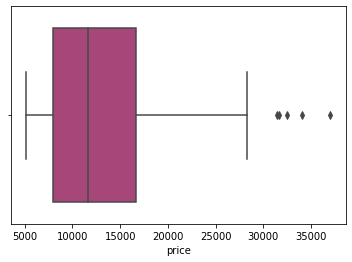

In [103]:
sns.boxplot(x="price", data=newdata1, palette="magma")
plt.show()

In [120]:
# We need to set a hypothesized mean (the mean we'd like to test, or the mean we'd expect in the population). In this example I'd like to test if the price would be 11900.
hmean = 11900

In [121]:
# As the p-value is lower than alpha we can conclude that average price of cars in dataset is different from the previously estabilished average price of cars.
# The first value is the t-test value, the second value is the p-value.
ttest, ttestpvaulue = ttest_1samp(newdata1["price"], hmean)
print("The t-test value of t-test is: ", round(ttest,5))
print("The p-value of t-test is: ", ttestpvaulue)

The t-test value of t-test is:  2.34297
The p-value of t-test is:  0.021131204696073953
